2024-02-04


[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_25220/3916750996.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA_30'][i] > data['SMA_100'][i]:
/tmp/ipykernel_25220/3916750996.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['SMA_30'][i] < data['SMA_100'][i]:
/tmp/ipykernel_25220/3916750996.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signal_buy.append(data['

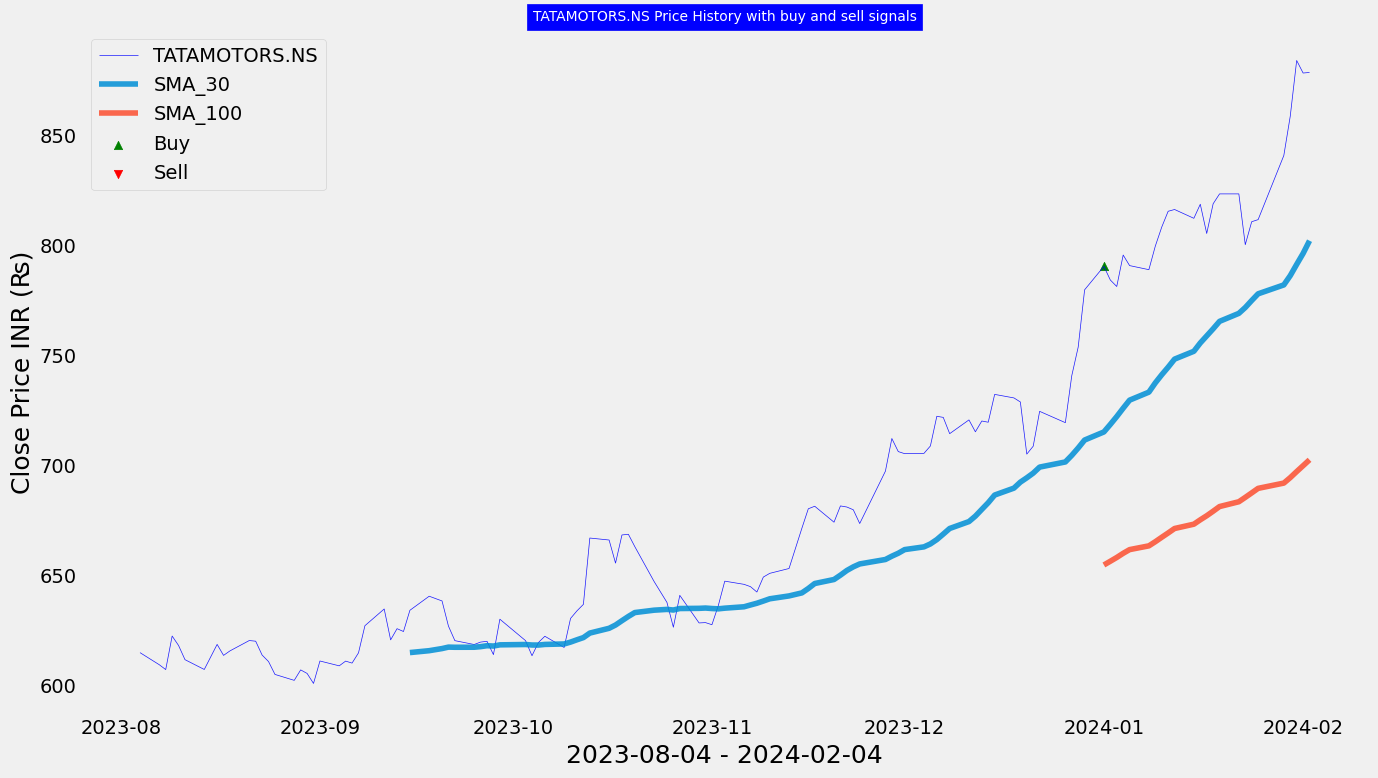

/tmp/ipykernel_25220/3916750996.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i]:
/tmp/ipykernel_25220/3916750996.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i]:
/tmp/ipykernel_25220/3916750996.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  macd_buy.append(df['Adj Close'][i])
/tmp/ipykernel_25220/3916750996.py:94: Fu

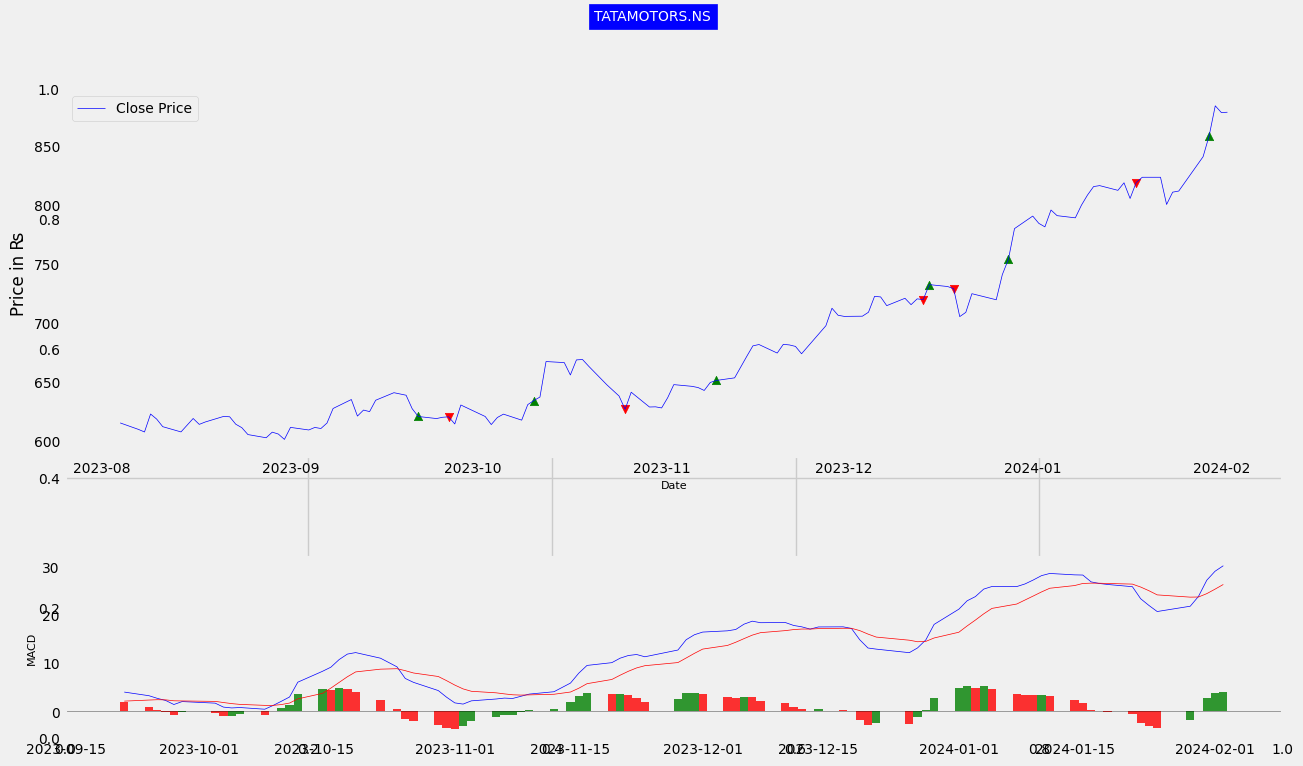

/tmp/ipykernel_25220/3916750996.py:157: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Adj Close'][i] < df['BBL_20_2.0'][i]:
/tmp/ipykernel_25220/3916750996.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Adj Close'][i] > df['BBU_20_2.0'][i]:


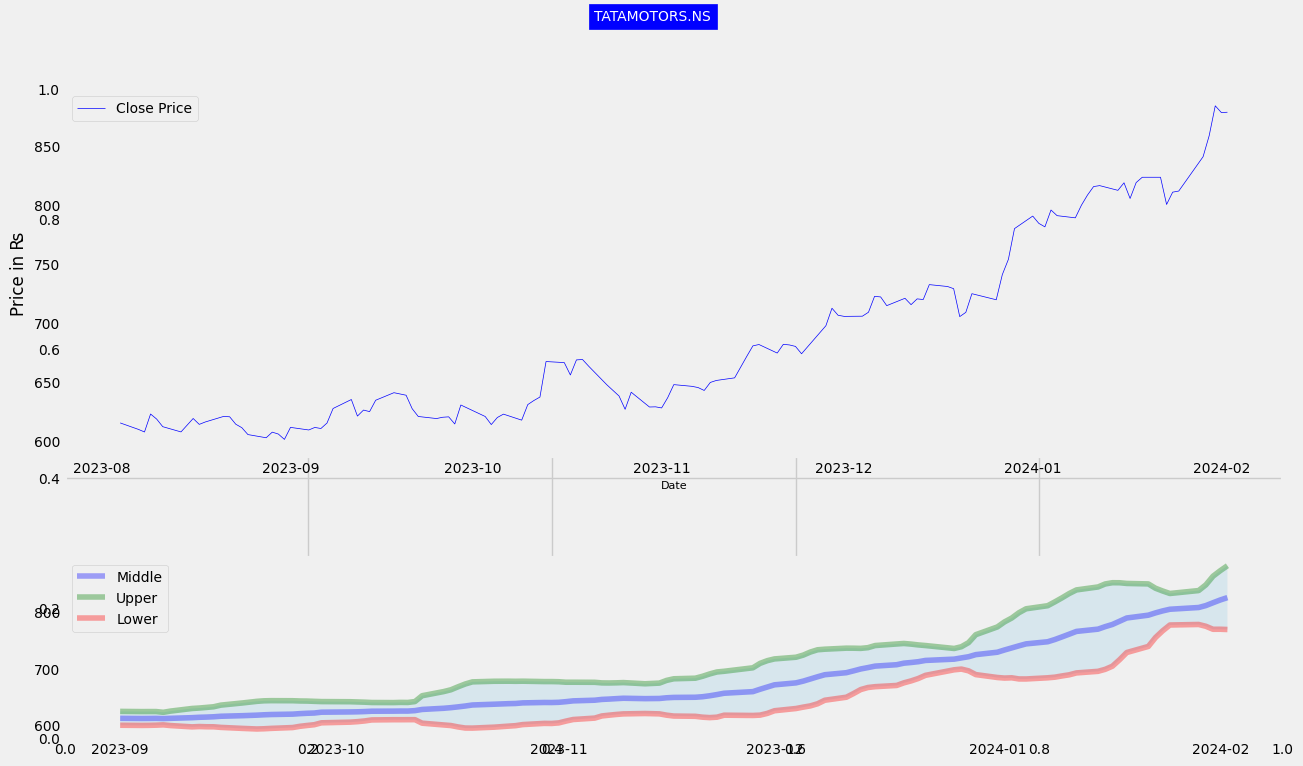

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date

plt.style.use('fivethirtyeight')
yf.pdr_override()

stock_symbols = ['TATAMOTORS.NS']
start_date = date(2023, 8, 4)
end_date = date.today()
print(end_date)

def get_portfolio_data(stocks=stock_symbols, start=start_date, end=end_date):
    data = yf.download(stocks, start=start, end=end)
    return data

data = get_portfolio_data(stock_symbols)

########### Simple Moving Average Implementation #############

data['SMA_30'] = ta.sma(data['Close'], 30)
data['SMA_100'] = ta.sma(data['Close'], 100)

# Function for buy and sell signal
def buy_sell(data):
    signal_buy = []
    signal_sell = []
    position = False 

    for i in range(len(data)):
        if data['SMA_30'][i] > data['SMA_100'][i]:
            if not position:
                signal_buy.append(data['Adj Close'][i])
                signal_sell.append(np.nan)
                position = True
            else:
                signal_buy.append(np.nan)
                signal_sell.append(np.nan)
        elif data['SMA_30'][i] < data['SMA_100'][i]:
            if position:
                signal_buy.append(np.nan)
                signal_sell.append(data['Adj Close'][i])
                position = False
            else:
                signal_buy.append(np.nan)
                signal_sell.append(np.nan)
        else:
            signal_buy.append(np.nan)
            signal_sell.append(np.nan)
    
    return pd.Series([signal_buy, signal_sell])

data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'], label=stock_symbols[0], linewidth=0.5, color='blue', alpha=0.9)
ax.plot(data['SMA_30'], label='SMA_30', alpha=0.85)
ax.plot(data['SMA_100'], label='SMA_100', alpha=0.85)
ax.scatter(data.index, data['Buy_Signal_price'], label='Buy', marker='^', color='green', alpha=1)
ax.scatter(data.index, data['Sell_Signal_price'], label='Sell', marker='v', color='red', alpha=1)
ax.set_title(stock_symbols[0] + " Price History with buy and sell signals", fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{start_date} - {end_date}', fontsize=18)
ax.set_ylabel('Close Price INR (₨)', fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

########### MACD Implementation #############

macd = ta.macd(data['Close'])

data = pd.concat([data, macd], axis=1).reindex(data.index)

def macd_strategy(df, risk):
    macd_buy = []
    macd_sell = []
    position = False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i]:
            macd_sell.append(np.nan)
            if not position:
                macd_buy.append(df['Adj Close'][i])
                position = True
            else:
                macd_buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i]:
            macd_buy.append(np.nan)
            if position:
                macd_sell.append(df['Adj Close'][i])
                position = False
            else:
                macd_sell.append(np.nan)
        elif position and df['Adj Close'][i] < macd_buy[-1] * (1 - risk):
            macd_sell.append(df["Adj Close"][i])
            macd_buy.append(np.nan)
            position = False
        elif position and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            macd_sell.append(df["Adj Close"][i])
            macd_buy.append(np.nan)
            position = False
        else:
            macd_buy.append(np.nan)
            macd_sell.append(np.nan)

    df['MACD_Buy_Signal_price'] = macd_buy
    df['MACD_Sell_Signal_price'] = macd_sell

macd_strategy(data, 0.025)

def macd_color(df):
    macd_color = []
    for i in range(0, len(df)):
        if df['MACDh_12_26_9'][i] > df['MACDh_12_26_9'][i - 1]:
            macd_color.append(True)
        else:
            macd_color.append(False)
    return macd_color

data['positive'] = macd_color(data)

plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stock_symbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close', data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index, 'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}), width=1, alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

############# Bollinger Bands Implementation #############

def bb_strategy(df):
    bb_buy = []
    bb_sell = []
    position = False
    bb = ta.bbands(df['Adj Close'], length=20, std=2)
    df = pd.concat([df, bb], axis=1).reindex(df.index)

    for i in range(len(df)):
        if df['Adj Close'][i] < df['BBL_20_2.0'][i]:
            if not position:
                bb_buy.append(df['Adj Close'][i])
                bb_sell.append(np.nan)
                position = True
            else:
                bb_buy.append(np.nan)
                bb_sell.append(np.nan)
        elif df['Adj Close'][i] > df['BBU_20_2.0'][i]:
            if position:
                bb_buy.append(np.nan)
                bb_sell.append(df['Adj Close'][i])
                position = False
            else:
                bb_buy.append(np.nan)
                bb_sell.append(np.nan)
        else:
            bb_buy.append(np.nan)
            bb_sell.append(np.nan)

    df['bb_Buy_Signal_price'] = bb_buy
    df['bb_Sell_Signal_price'] = bb_sell

    return df

# Storing the function
data = bb_strategy(data)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))
fig.suptitle(stock_symbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'], label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35)  # middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35)  # Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35)  # lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()

################ The End #############


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date

plt.style.use('fivethirtyeight')
yf.pdr_override()

# Function to get data for a given stock
def get_stock_data(stock, start, end):
    data = yf.download(stock, start=start, end=end)
    return data

# Function to check conditions and filter stocks
def filter_stocks(stock_list, start, end):
    filtered_stocks = []

    for stock_symbol in stock_list:
        data = get_stock_data(stock_symbol, start, end)

        # Add your RSI, MACD, and Bollinger Bands conditions here
        # For example, you can use the following conditions:
        # rsi_condition = (data['RSI_14'] > 30) & (data['RSI_14'] < 70)
        # macd_condition = (data['MACDh_12_26_9'] > 0)
        # bb_condition = (data['Adj Close'] > data['BBL_20_2.0']) & (data['Adj Close'] < data['BBU_20_2.0'])
        
        # Combine conditions as needed
        # final_condition = rsi_condition & macd_condition & bb_condition

        # If all conditions are met, add the stock to the filtered list
        # if final_condition.all():
        #     filtered_stocks.append(stock_symbol)
        
        # Note: You need to adjust conditions based on your specific criteria

    return filtered_stocks

# Read stock symbols from the text file
file_path = 'Screener/nifty50_symbols.txt'
with open(file_path, 'r') as file:
    stock_symbols = [line.strip() for line in file.readlines()]

# Set start and end dates
start_date = date(2017, 8, 4)
end_date = date.today()

# Filter stocks based on conditions
filtered_stocks = filter_stocks(stock_symbols, start_date, end_date)

# Print the filtered stocks
print("Filtered Stocks:")
print(filtered_stocks)
